<a href="https://colab.research.google.com/github/Just-Aymz/Customer-Shopping/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**
___

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from scipy.stats import kurtosis, skew, shapiro
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from typing import Optional


# **Read Files**
___

In [2]:
# Set Pandas to display all columns
pd.set_option('display.max_columns', None)

try:
  # Read in the dataset
  df = pd.read_csv('data/shopping_trends.csv')
except FileNotFoundError:
  url = 'https://raw.githubusercontent.com/Just-Aymz/Customer-Shopping/refs/heads/main/shopping_trends.csv'
  df = pd.read_csv(url)



# **Dataset Identification**
___

##### 1. **Shape and Size**

In [3]:
# Return the size and the shape of the dataset
print(
    f'The shape of the dataframe: {df.shape}\n'
    f'The size of the dataframe: {df.size}.'
)

The shape of the dataframe: (3900, 19)
The size of the dataframe: 74100.


##### 2. **Axes**

In [4]:
# Return the axes of the dataset
df.axes

[RangeIndex(start=0, stop=3900, step=1),
 Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
        'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
        'Review Rating', 'Subscription Status', 'Payment Method',
        'Shipping Type', 'Discount Applied', 'Promo Code Used',
        'Previous Purchases', 'Preferred Payment Method',
        'Frequency of Purchases'],
       dtype='object')]

##### 3. **Dataset Summary**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

##### 4. **Dataset Overview**

In [6]:
# Return the top 5 rows of the dataframe
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
# Return the bottom 5 rows of the dataframe
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


# **Data Preprocessing**
___

### 1. **Data Cleaning**
Dataset preprocessing is the process of cleaning and transforming raw data into a format suitable for analysis or machine learning. It involves handling missing values, removing duplicates, correcting inconsistencies, scaling or normalizing features, encoding categorical variables, and selecting relevant features. The goal is to ensure that the data is accurate, consistent, and structured to improve the performance of analytical models and algorithms.



#### 1.1 **Duplicate Values**
In the context of a dataframe, a record can be a duplicate of another record, if all the data values of each feature are identical. A record can also be considered a duplicate if the data values of a specified subset of features are identical. In this section, we look to identify and remove the duplicate values within the dataset.


In [8]:
dupes = df.duplicated().sum()
if dupes > 0:
    print(f'There are a total of {dupes} in the dataset')
else:
    print('There are no duplicate values within the dataset')

There are no duplicate values within the dataset


#### 1.2. **Null Values**

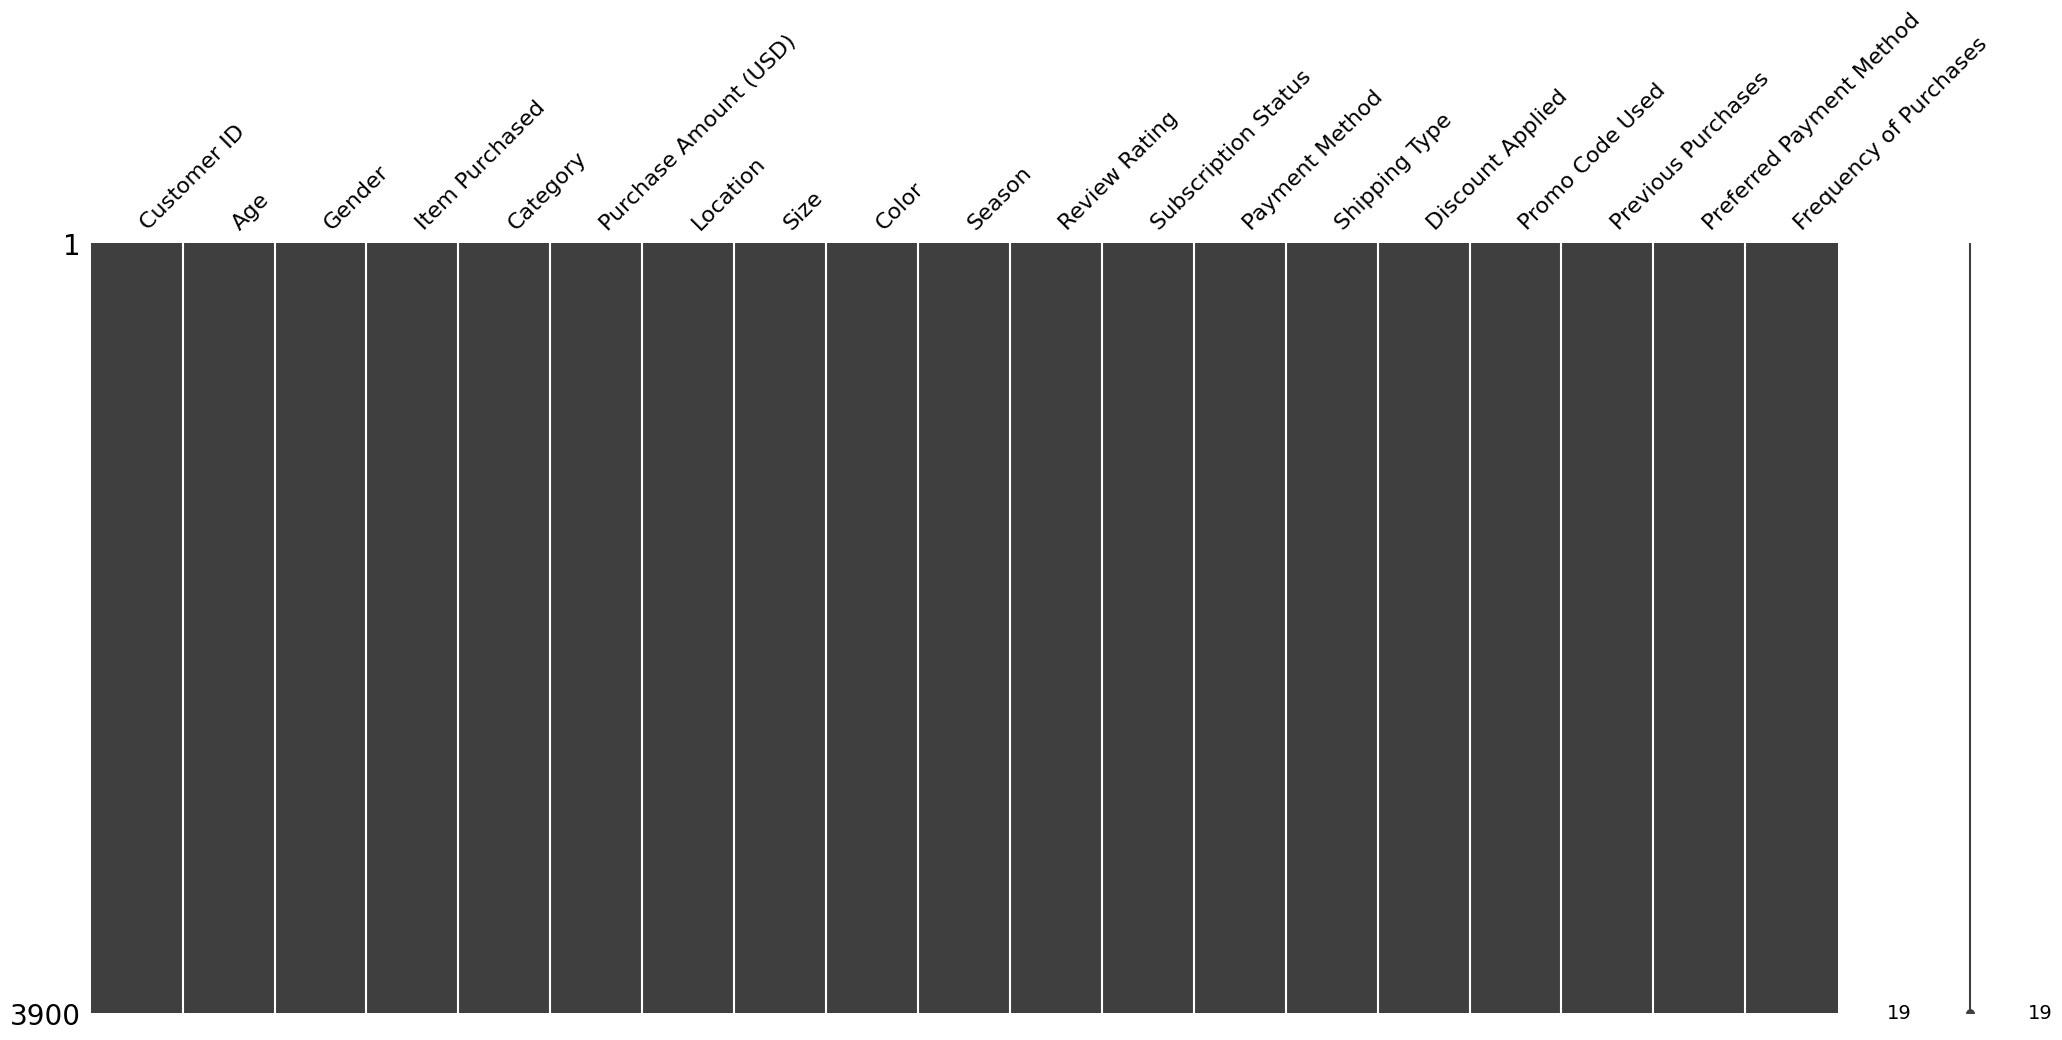

In [9]:
# Visualize the null values within the dataset
mno.matrix(df)
plt.show()

In [10]:
nulls = np.count_nonzero(df.isnull().values)
if nulls > 0:
    print(f'There is a total of {nulls} in the dataset')
else:
    print('There are no null values within the dataset.')

There are no null values within the dataset.


#### 1.3 **Outlier Values**

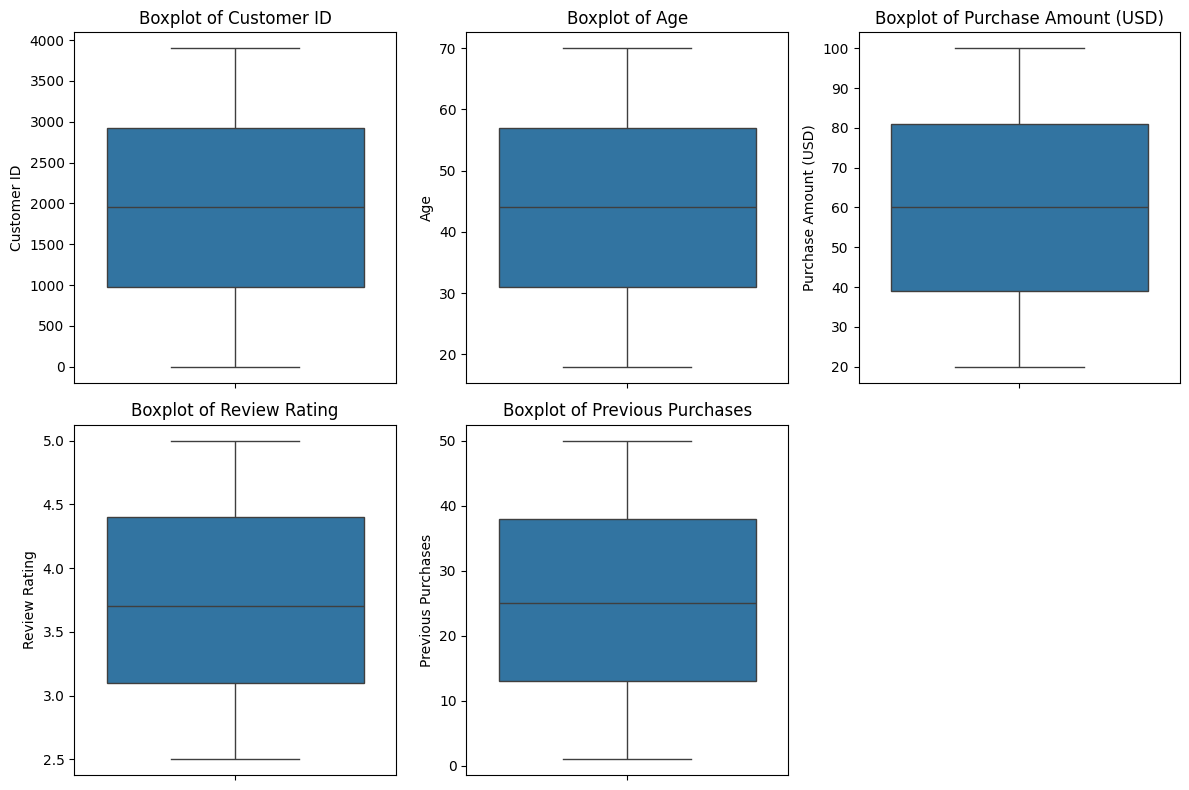

In [11]:
# Visualize the box plots of each feature to determine
#  whether there are outlier values within the dataset
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the 2D array of axes
axs = axs.ravel()

# Plot boxplots for each feature
for i, column in enumerate(
    df.select_dtypes(include='number').columns
):
    # Ensure we don't exceed the number of subplots
    if i < len(axs):
        sns.boxplot(data=df, y=column, ax=axs[i])
        axs[i].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for j in range(len(df.select_dtypes(include='number').columns)
               , len(axs)):
    fig.delaxes(axs[j])  # Remove empty subplots

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [12]:
def outlier_Detection(column: str, dataframe: Optional[pd.DataFrame]=df):
    # Identify the first and the third quantile values
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)

    # Store the IQR value
    IQR = q3 - q1

    # Store the upper and the lower limits
    upper = dataframe[column] > q3 + (IQR * 1.5)
    lower = dataframe[column] < q1 - (IQR * 1.5)

    outliers = dataframe[column][upper | lower]

    if len(outliers) == 0:
        print(f'{column.title()} has no outlier values')
    else:
        print(f'Column: {column.title()}\n Total outliers: {len(outliers)}')

In [13]:
for feature in df.select_dtypes(include='number').columns:
    outlier_Detection(feature)

Customer Id has no outlier values
Age has no outlier values
Purchase Amount (Usd) has no outlier values
Review Rating has no outlier values
Previous Purchases has no outlier values


#### 1.4 **Miscellaneous Errors**
___
These errors can be generalized as the errors found in the data values of the records in the dataframe. This step includes converting features to correct datatypes. In this section we look to correct those data errors in order to feed a clean dataset to our machine learning models.


##### 1.4.1 **Features**

In [14]:
# Replace the space between each word in the column title with an underscore
new_features = [feature.replace(' ', '_') for feature in df.columns.tolist()]
old_features = df.columns.tolist()

# rename the features using mapping
df_1 = df.rename(dict(zip(old_features, new_features)), axis=1)

##### 1.4.2 **Index**

In [15]:
# Set the customer id colummn as the index of the feature
df_2 = df_1.set_index('Customer_ID')

##### 1.4.3 **Categorical Features**

In [16]:
# Return an overview of all the categorical features
cat_features_df = df_2.select_dtypes(exclude='number')
cat_features_df.head()

,Gender,Item_Purchased,Category,Location,Size,Color,Season,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Preferred_Payment_Method,Frequency_of_Purchases
Customer_ID,,,,,,,,,,,,,,
1,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,Venmo,Fortnightly
2,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,Cash,Fortnightly
3,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,Credit Card,Weekly
4,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,PayPal,Weekly
5,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Cash,Free Shipping,Yes,Yes,PayPal,Annually


In [17]:
# Return the total number of unique values within the categorical features
cat_unique_ser = cat_features_df.nunique()
cat_unique_ser

,0
Gender,2
Item_Purchased,25
Category,4
Location,50
Size,4
Color,25
Season,4
Subscription_Status,2
Payment_Method,6
Shipping_Type,6


In [18]:
# Store the categorical features with only two or less unique values
binary_features = cat_unique_ser[cat_unique_ser <= 2].index.tolist()
binary_features

['Gender', 'Subscription_Status', 'Discount_Applied', 'Promo_Code_Used']

In [19]:
# Find the total number of features with less than or equal to 10 values
categorical_features = list(set(cat_unique_ser.index.tolist()).difference(set(binary_features)))
categorical_features

['Size',
 'Season',
 'Preferred_Payment_Method',
 'Frequency_of_Purchases',
 'Payment_Method',
 'Shipping_Type',
 'Color',
 'Item_Purchased',
 'Category',
 'Location']

In [20]:
large_categorical_features = cat_unique_ser[cat_unique_ser > 10].index.to_list()
large_categorical_features

['Item_Purchased', 'Location', 'Color']

In [21]:
for feature in df_2.loc[:, binary_features]:
    print(f'{feature}: ', end='')
    print(f'{", ".join(df_2[feature].unique())}\n')

Gender: Male, Female

Subscription_Status: Yes, No

Discount_Applied: Yes, No

Promo_Code_Used: Yes, No



In [22]:
# Remove the large_categorical_features from the categorical_faetures
cat_feat = list(set(categorical_features).difference(set(large_categorical_features)))

for feature in df_2.loc[:, cat_feat]:
    print(f'{feature}: ', end='')
    print(f'{", ".join(df_2[feature].unique())}\n')

Size: L, S, M, XL

Season: Winter, Spring, Summer, Fall

Preferred_Payment_Method: Venmo, Cash, Credit Card, PayPal, Bank Transfer, Debit Card

Frequency_of_Purchases: Fortnightly, Weekly, Annually, Quarterly, Bi-Weekly, Monthly, Every 3 Months

Payment_Method: Credit Card, Bank Transfer, Cash, PayPal, Venmo, Debit Card

Shipping_Type: Express, Free Shipping, Next Day Air, Standard, 2-Day Shipping, Store Pickup

Category: Clothing, Footwear, Outerwear, Accessories



In [23]:
# Duplicated the dataframe for version control
df_3 = df_2.copy()


# Map Frequency_of_Purchases using conditional mapping
df_3['Frequency_of_Purchases'] = (
np.where(df_3['Frequency_of_Purchases'] == 'Bi-Weekly',
         'Fortnightly',
         np.where(df_3['Frequency_of_Purchases'] == 'Every 3 Months',
                  'Quarterly',
                  df_3['Frequency_of_Purchases']
                    )
        )
)


##### 1.4.4 **Numeric Features**

In [24]:
# Store the numeric features as a subset dataframe
numeric_features = df_3.select_dtypes(exclude='object')
numeric_features.head()

,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
Customer_ID,,,,
1,55,53,3.1,14
2,19,64,3.1,2
3,50,73,3.1,23
4,21,90,3.5,49
5,45,49,2.7,31


In [25]:
# Return a summary of the numeric features
numeric_features.describe()

,Age,Purchase_Amount_(USD),Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


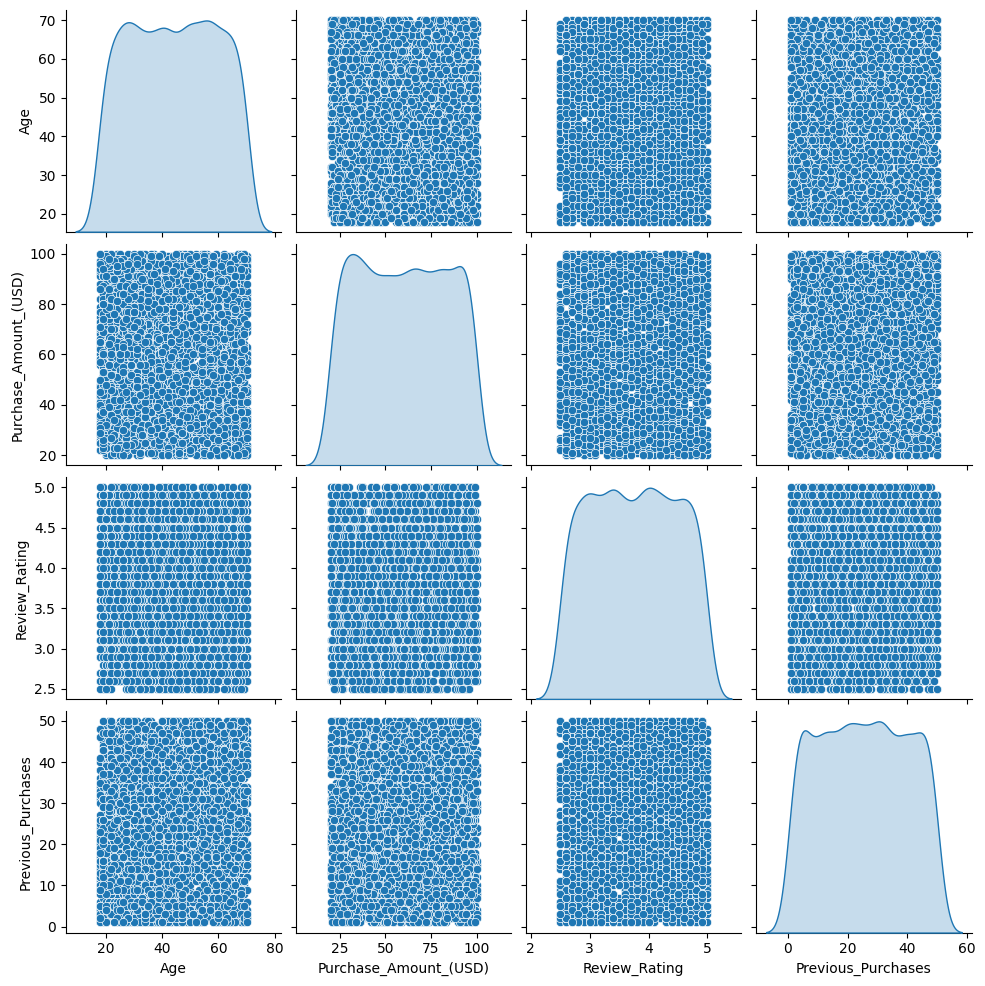

In [26]:
# Use the numeric features to find the distribution of the features
sns.pairplot(numeric_features, diag_kind='kde')
plt.show()

### 2. **Data Transformation**
Data transformation refers to the process of converting data from one format or structure into another. This step is important in preparing your data for analysis, machine learning models, or other types of data processing. The main goal of data transformation is to make the dataset more suitable for analysis or machine learning by improving its structure, scaling, and features.


#### 2.1 **Feature Engineering**

##### 2.1.1 **Age binning**

In [27]:
# Duplicate the dataframe for version control
df_4 = df_3.copy()
# Create the Bin for the feature
bin_ = [0, 12, 19, 35, 50, np.inf]

# Create the labels that will be mapped to the bin values
labels_ = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create the age binned feature for the dataframe
df_4['Age_binned'] = pd.cut(df_3['Age'], bins=bin_, labels=labels_)

# Drop the Age feature
df_4 = df_4.drop(columns=['Age'])
df_4.head()

,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,Age_binned
Customer_ID,,,,,,,,,,,,,,,,,,
1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Senior
2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Teen
3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Adult
4,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult
5,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Adult


##### 2.1.2 **Review Rating Binning**

In [28]:
# Duplicate the dataframe for version control
df_5 = df_4.copy()
# Create the Bin for the feature
bin__ = [0, 3, 4, 5]

# Create the labels that will be mapped to the bin values
labels__ = ['Bad', 'Average', 'Good']

# Create the age binned feature for the dataframe
df_5['Rating_binned'] = pd.cut(df_4['Review_Rating'], bins=bin__, labels=labels__)

# Drop the Review_Rating feature
df_5 = df_5.drop(columns=['Review_Rating'])
df_5.head()

,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,Age_binned,Rating_binned
Customer_ID,,,,,,,,,,,,,,,,,,
1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Senior,Average
2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Teen,Average
3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Adult,Average
4,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult,Average
5,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Adult,Bad


#### 2.2 **Clustering**

In [29]:
# Store the target features for clustering
mf_features = df_5.loc[:, ['Purchase_Amount_(USD)', 'Previous_Purchases']]
mf_features

,Purchase_Amount_(USD),Previous_Purchases
Customer_ID,,
1,53,14
2,64,2
3,73,23
4,90,49
5,49,31
...,...,...
3896,28,32
3897,49,41
3898,33,24


##### 2.2.1 **Normality Test**

In [30]:
def normality_Test(column: str, dataframe: Optional[pd.DataFrame]=mf_features):
  # Store the skew value
  _skew = skew(dataframe[column])
  # Perform Shapiro-Wilk test
  stat, p_value = shapiro(dataframe[column])

  # Print the results
  print(f"KS Normality test: {stat:.4f}")
  print(f"P-value: {p_value:.4f}")

  # Interpret the p-value
  alpha = 0.05
  if p_value > alpha:
    print("The data is likely normally distributed (fail to reject H0).")
  else:
    print("The data is not normally distributed (reject H0).")

  # Check the absolute values of each skew value of a feature
  if np.abs(_skew) < 0.5:
    print('distribution is almost symmetrical')
  elif 0.5 <= np.abs(_skew) <= 1:
    print('distribution is modertely skewed')
  else:
    print('distribution is highly skewed')

for feature in mf_features:
  print(f'{feature}:')
  normality_Test(feature)
  print()

Purchase_Amount_(USD):
KS Normality test: 0.9502
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is almost symmetrical

Previous_Purchases:
KS Normality test: 0.9541
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is almost symmetrical



##### 2.2.2 **Feature Scaling**

In [31]:
def feature_Scaling(
    feature: str, dataframe: Optional[pd.DataFrame]=None
):
  # Instantiate a StandardScaler object
  scaler = StandardScaler()

  # Fit and transform the feature and return the scaled version
  return scaler.fit_transform(dataframe[[feature]]).flatten()

# Apply the function column-wise
scaled_df = mf_features.apply(lambda col: feature_Scaling(col.name, dataframe=mf_features), axis=0)

In [32]:
scaled_df

,Purchase_Amount_(USD),Previous_Purchases
Customer_ID,,
1,-0.285629,-0.785831
2,0.178852,-1.616552
3,0.558882,-0.162789
4,1.276716,1.637107
5,-0.454531,0.391025
...,...,...
3896,-1.341267,0.460252
3897,-0.454531,1.083293
3898,-1.130139,-0.093563


##### 2.2.3 **Cluster Analysis**

During this section, we will look to classify the clusters based on their characteristics, and then rename the clusters to aptly cover characteristics of the values from the features used to characterise the clusters.

In [33]:
# Instantiate the kmeans clustering model
def kmeansInertias(k: int, r: int, X: pd.DataFrame) -> float:
    """
    Computes the inertia (sum of squared distances of samples to their closest cluster center)
    for a KMeans clustering model with a specified number of clusters and random state.

    Args:
        k (int):
            The number of clusters for the KMeans model.
        r (int):
            The random state to ensure reproducibility.
        X (pd.DataFrame):
            The dataset on which to perform clustering.

    Returns:
        float:
            The inertia of the fitted KMeans model, representing the clustering quality.
    """
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(X)

    return kmeans.inertia_


def elbow_Kmeans(X: pd.DataFrame, dataset: str, max_k=10, r=42) -> None:
    """
    Generates an elbow graph to help determine the optimal number of clusters (K)
    for KMeans clustering on a given dataset by plotting the inertia values
    for each K in the specified range.

    Args:
        X (pd.DataFrame):
            The dataset on which to perform KMeans clustering.
        dataset (str):
            The name of the dataset, used for the plot title.
        max_k (int, optional):
            The maximum number of clusters to consider for the elbow method. Default is 10.
        r (int, optional):
            The random state to ensure reproducibility across clustering runs. Default is 42.

    Returns:
        None:
            Displays an elbow graph to visually determine the optimal K.
    """
    inertias = [kmeansInertias(i, r=r, X=X) for i in range(1, max_k + 1)]
    sns.lineplot(x=range(1, 11), y=inertias, marker='o')
    plt.xlabel('K: Number of clusters')
    plt.ylabel('Inertia')
    plt.title(f'{dataset} Elbow Graph')
    plt.grid(True)

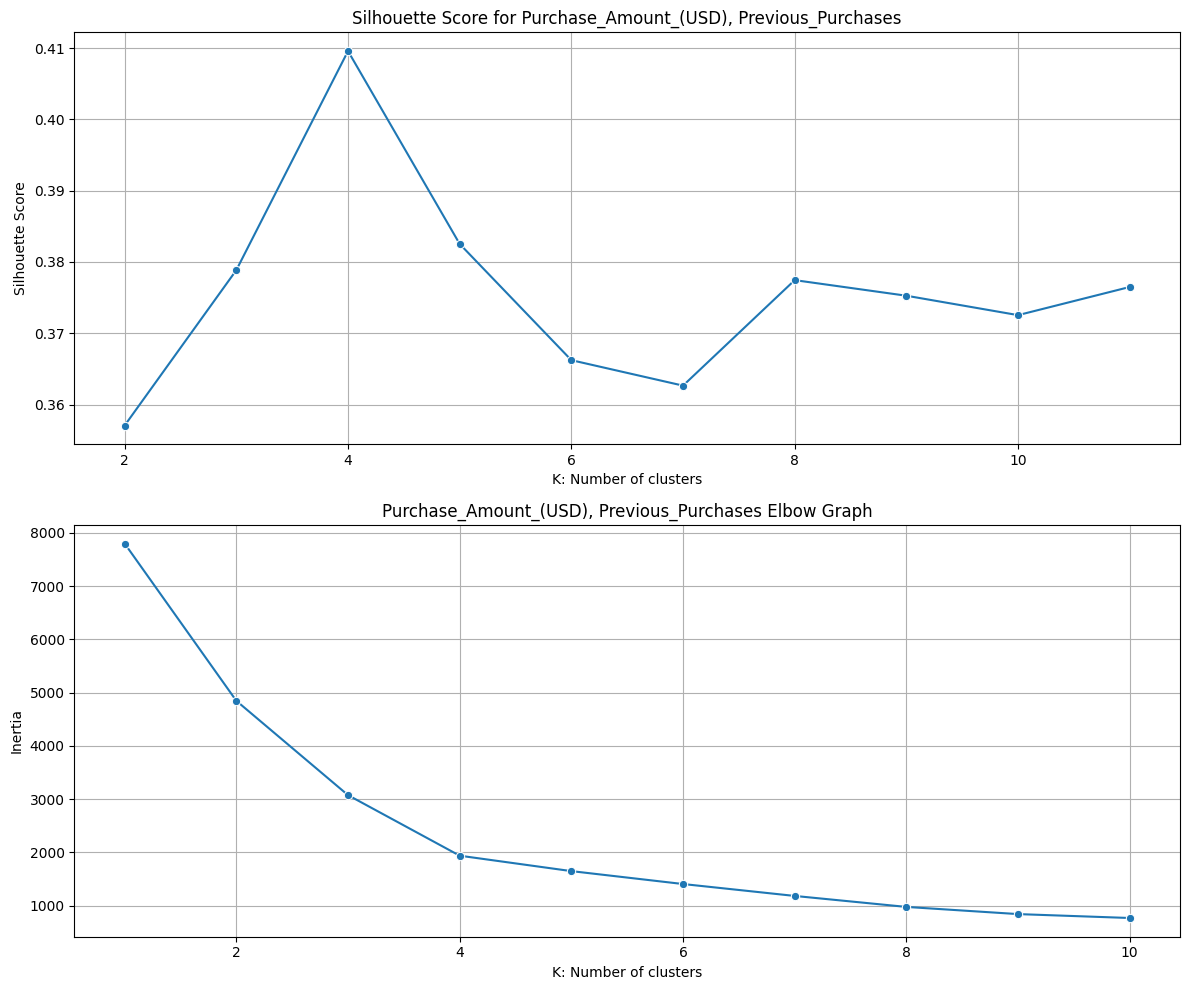

In [34]:
def silhouetteScore(dataframe: pd.DataFrame, dataset: str) -> None:
    """
    Calculates and plots the silhouette score for KMeans clustering across a range of cluster counts
    to help assess cluster quality and identify the optimal number of clusters for a dataset.

    Args:
        dataframe (pd.DataFrame):
            The dataset on which to perform KMeans clustering.
        dataset (str):
            The name of the dataset, used in the plot title.

    Returns:
        None:
            Displays a line plot of silhouette scores for different numbers of clusters (K).
    """

    # Silhouette score method
    kmax = 10
    sil = []
    plt.plot()
    for k in range(2, kmax+2):
        kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
        kmeans.fit(dataframe)
        labels = kmeans.labels_
        sil.append(silhouette_score(dataframe, labels, metric='euclidean'))

    sns.lineplot(x=range(2, kmax+2), y=sil, marker='o')
    plt.title(f'Silhouette Score for {dataset}')
    plt.xlabel('K: Number of clusters')
    plt.ylabel(f"Silhouette Score")
    plt.grid(True)


plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
silhouetteScore(scaled_df, dataset='Purchase_Amount_(USD), Previous_Purchases')
plt.subplot(2, 1, 2)
elbow_Kmeans(scaled_df, dataset='Purchase_Amount_(USD), Previous_Purchases')

plt.tight_layout()
plt.show()

In [35]:
# Predict clusters for non-outlier dataset
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels_ = kmeans.fit_predict(scaled_df)

# Insert predictions into the scaled dataframe
scaled_df['Cluster'] = cluster_labels_

scaled_df.head()

,Purchase_Amount_(USD),Previous_Purchases,Cluster
Customer_ID,,,
1,-0.285629,-0.785831,3
2,0.178852,-1.616552,2
3,0.558882,-0.162789,2
4,1.276716,1.637107,0
5,-0.454531,0.391025,1


In [36]:
# Duplicate the current dataframe for version control
df_6 = df_5.copy()

# Add the Cluster column to the dataframe
df_6['Cluster'] = scaled_df['Cluster']

# Return overview of the dataframe to confirm the addition of the Cluster
# feature
df_6.head(3)

,Gender,Item_Purchased,Category,Purchase_Amount_(USD),Location,Size,Color,Season,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,Age_binned,Rating_binned,Cluster
Customer_ID,,,,,,,,,,,,,,,,,,,
1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Senior,Average,3
2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Teen,Average,2
3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Adult,Average,2


In [37]:
def violinPlot(dataframe: pd.DataFrame):
    plt.figure(figsize=(24, 16))

    for i, column in enumerate(dataframe.drop(columns=['Cluster'])):
        plt.subplot(3, 4, 1 + i)
        sns.violinplot(x=dataframe['Cluster'], y=dataframe[column], hue=dataframe['Cluster'], legend=False)
        sns.violinplot(y=dataframe[column], palette='gray', linewidth=1.0)
        plt.title(f'{column} Value by Cluster')
        plt.ylabel(f'{column} Value')

    plt.suptitle('Cluster Analysis')
    plt.tight_layout()
    plt.show()

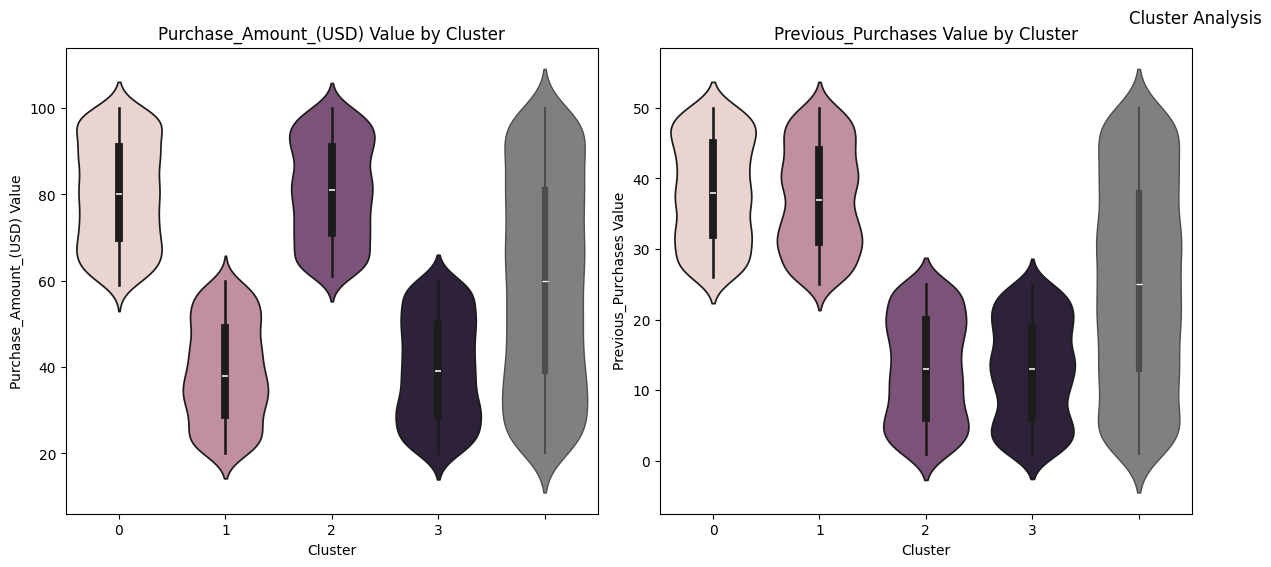

In [38]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
violinPlot(df_6.loc[:, ['Purchase_Amount_(USD)', 'Previous_Purchases', 'Cluster']])

**Cluster 0**

- *Purchase_Amount_(USD)*
  - The average value for all the Purchase_Amount_(USD) in the dataset is approximately $60.

  - This particular cluster has an average purchase amount of $80.
- *Previous_Purchases*
  - The average value for all total previous number of purchases in the dataset is approximately 25 days

  - This particular cluster has an average total number of purchases of 38 days.
- *Summary*
  - Thus, this cluster consists of customers who spend more per transaction but do so less often compared to the general population.
- **Classification**:
  - *High-Value, Low-Frequency Customers*
  - **Big Spenders**

**Cluster 1**

- *Purchase_Amount_(USD)*
  - The average value for all the Purchase_Amount_(USD) in the dataset is approximately $60.

  - This particular cluster has an average purchase amount of $39.
- *Previous_Purchases*
  - The average value for all total previous number of purchases in the dataset is approximately 25 days

  - This particular cluster has an average total number of purchases of 37 days.
- *Summary*
  - Thus, this cluster consists of customers who make smaller, less frequent purchases compared to the general population.
- **Classification**:
  - *Low-Value, Low-Frequency Customers*
  - **Occasional Shoppers**

**Cluster 2**

- *Purchase_Amount_(USD)*
  - The average value for all the Purchase_Amount_(USD) in the dataset is approximately $60.

  - This particular cluster has an average purchase amount of $80.
- *Previous_Purchases*
  - The average value for all total previous number of purchases in the dataset is approximately 25 days

  - This particular cluster has an average total number of purchases of 12 days.
- *Summary*
  - Thus, this cluster consists of customers who make larger and more frequent purchases compared to the general population.
- **Classification**:
  - *High-Value, High-Frequency Customers*
  - **Loyal Premium Shoppers**

**Cluster 3**

- *Purchase_Amount_(USD)*
  - The average value for all the Purchase_Amount_(USD) in the dataset is approximately $60.

  - This particular cluster has an average purchase amount of $39.
- *Previous_Purchases*
  - The average value for all total previous number of purchases in the dataset is approximately 25 days

  - This particular cluster has an average total number of purchases of 12 days.
- *Summary*
  - Thus, this cluster consists of customers who make smaller but more frequent purchases compared to the general population.
- **Classification**:
  - *Low-Value, High-Frequency Customers*
  - **Frequent Low-Value Shoppers**

In [39]:
# Map the cluster names to the deduced names based on the violin plot values.
df_6['Cluster'] = (
    np.where(df_6['Cluster'] == 0, 'Big Spenders',
         np.where(df_6['Cluster'] == 1, 'Occasional Shoppers',
                  np.where(df_6['Cluster'] == 2, 'Loyal Premium Shoppers',
                           'Frequent Low-Value Shoppers'
                           )
                  )
         )
)

# Return the the count of all the customer cluster groupings
df_6['Cluster'].value_counts()

,count
Cluster,
Frequent Low-Value Shoppers,990
Big Spenders,977
Occasional Shoppers,975
Loyal Premium Shoppers,958


### 2. **Exploratory Data Analysis**

#### 2.1 **Univariate Analysis**

In [40]:
new_category_df = df_6.select_dtypes(include='object')
new_category_df.head()

,Gender,Item_Purchased,Category,Location,Size,Color,Season,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Preferred_Payment_Method,Frequency_of_Purchases,Cluster
Customer_ID,,,,,,,,,,,,,,,
1,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Yes,Yes,Venmo,Fortnightly,Frequent Low-Value Shoppers
2,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Yes,Yes,Cash,Fortnightly,Loyal Premium Shoppers
3,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,Credit Card,Weekly,Loyal Premium Shoppers
4,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,PayPal,Weekly,Big Spenders
5,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Cash,Free Shipping,Yes,Yes,PayPal,Annually,Occasional Shoppers


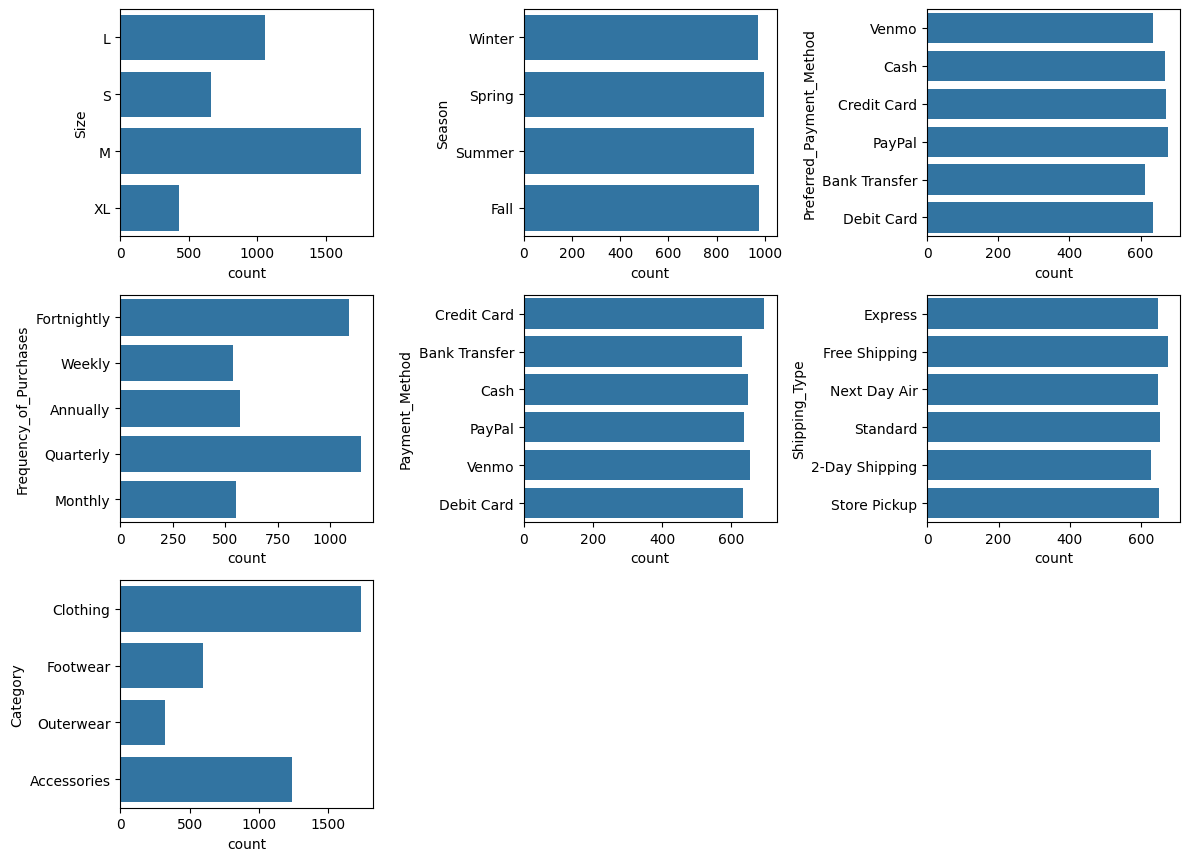

In [46]:
plt.figure(figsize=(12, 14))

# List of columns to plot
features = new_category_df.loc[:, cat_feat].columns.tolist()

for i, col in enumerate(features):
  plt.subplot(5, 3, i + 1)
  sns.countplot(y=col, data=new_category_df.loc[:, cat_feat])

plt.tight_layout()
plt.show()

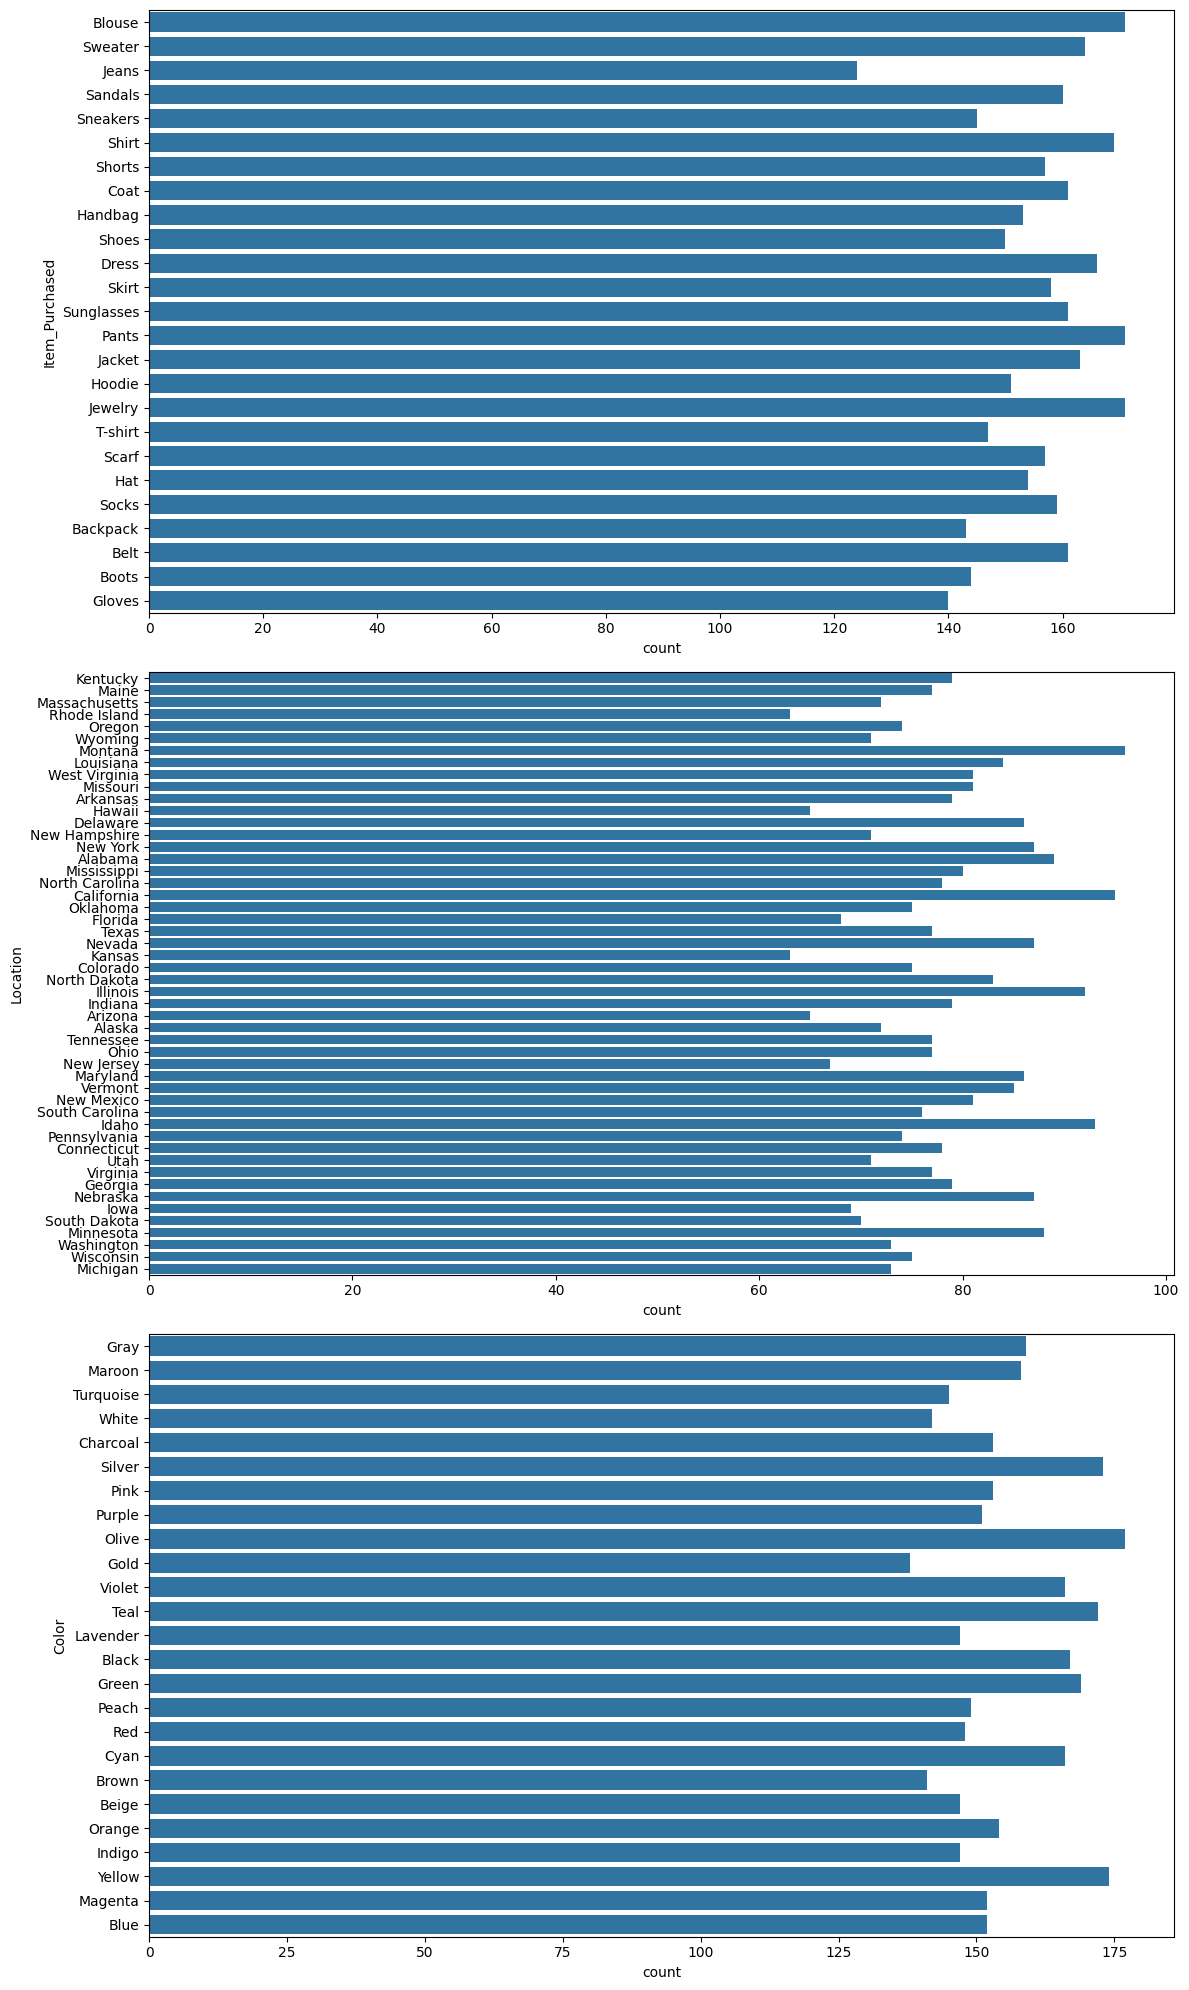

In [53]:
plt.figure(figsize=(12, 20))

# List of columns to plot
features = new_category_df.loc[:, large_categorical_features].columns.tolist()

for i, col in enumerate(features):
  plt.subplot(3, 1, i + 1)
  sns.countplot(y=col, data=new_category_df.loc[:, large_categorical_features])

plt.tight_layout()
plt.show()